In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.datasets import load_files
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
hello = tf.constant('TensorFlow 2.0 Hello World')
tf.print(hello)

TensorFlow 2.0 Hello World


In [4]:
print(hello)

tf.Tensor(b'TensorFlow 2.0 Hello World', shape=(), dtype=string)


In [5]:
# Reading in the train and test folders and label file
train_folder = 'C:/Users/Ariel/Desktop/01 DATA SCIENCE/Springboard/Capstone 2/dog-breed-identification/train'
test_folder = 'C:/Users/Ariel/Desktop/01 DATA SCIENCE/Springboard/Capstone 2/dog-breed-identification/test'
label = pd.read_csv('C:/Users/Ariel/Desktop/01 DATA SCIENCE/Springboard/Capstone 2/dog-breed-identification/labels.csv')

In [6]:
breed_of_image = label['breed']

In [7]:
breed_of_image

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [8]:
# Getting the total number of dog breeds
breed_of_image.nunique()

120

In [16]:
# Creating a list of the breeds 
breed_set = set(breed_of_image)
breeds = []
for breed in breed_set:
    breeds.append(breed)

# Sorting the list alphabetically
breeds.sort()    

In [38]:
breed_id = []
breed_list = []
for index, breed in enumerate(breeds):
    breed_list = [index, breed]
    breed_id.append(breed_list)

In [43]:
print(breed_id[0])
print(breed_id[0][0])
print(breed_id[0][1])

[0, 'affenpinscher']
0
affenpinscher


In [63]:
image_breed_id = []
to_append = []
for breed in breed_of_image:
    for row in range(len(breed_id)):
        if breed == breed_id[row][1]:
            to_append = breed_id[row][0]
            image_breed_id.append(to_append)
        else:
            pass    

In [41]:
# Checking the size of all the images
image_shape = []
for image in os.listdir(train_folder):
    images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
    image_shape.append(images.shape)

In [53]:
# Creating the x and y values for the plot
x_image_shape = [image_shape[row][1] for row in range(len(image_shape))]
y_image_shape = [image_shape[row][0] for row in range(len(image_shape))]

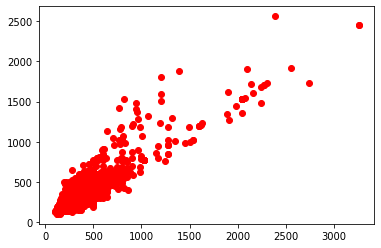

In [60]:
# Plotting the sizes of the images
plt.plot(x_image_shape, y_image_shape, 'ro')
plt.show()

In [80]:
#print(max(x_image_shape))
for row in range(len(image_shape)):
    if image_shape[row][1] == 3264:
        print(row, image_shape[row])

6693 (2448, 3264)
7645 (2448, 3264)


In [94]:
# Checking to see if image #6693 looks good when resized to 200x200
image_size = 200
for index, image in enumerate(os.listdir(train_folder)):
    images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
    images = cv2.resize(images, (image_size, image_size))
    if index == 6693:
        break

In [95]:
print(images.shape)

(200, 200)


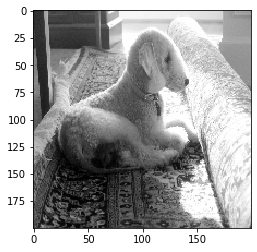

In [96]:
plt.imshow(images, cmap='gray')
plt.show()

Image #6693 (one of the largest images) looks good at 200x200 so, all images will be resized to that ratio.

In [105]:
breed_of_image

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [ ]:
# Build function to create the training data set
train_data = []
image_size = 200

def training_data_set():
    for image in os.listdir(train_folder):
        images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
        images = cv2.resize(images, (image_size, image_size))
        train_data.append([images, ])


(200, 200)


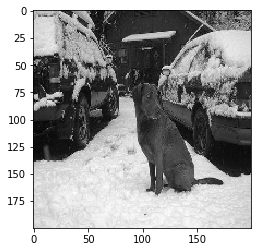

In [98]:
print(images.shape)
plt.imshow(images, cmap='gray')
plt.show()